In [1]:
import pandas as pd
import numpy as np
import requests
import json
import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
# sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials())
from pprint import pprint
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from mpl_toolkits.axes_grid1 import host_subplot

In [2]:
# Reading artist_df
artist_data_file = os.path.join("Artistfile.csv")
artist_df= pd.read_csv(artist_data_file)
artist_df.head()

,Artist Name,Artist ID,Artist_Popularity,Artist_Followers,Artist Genre,Main Genre
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,90.0,16410055.0,"beatlesque,british invasion,classic rock,merse...",beatlesque
1,The Rolling Stones,22bE4uQ6baNwSHPVcDxLCe,84.0,8678847.0,"album rock,british invasion,classic rock,rock",album rock
2,Bob Dylan,74ASZWbe4lXaubB36ztrGX,79.0,4220152.0,"album rock,classic rock,country rock,folk,folk...",album rock
3,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,82.0,5524310.0,"album rock,art rock,classic rock,dance rock,gl...",album rock
4,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,82.0,9060576.0,"album rock,classic rock,hard rock,rock",album rock


In [3]:
#reading tracks_df
tracks_data_file = os.path.join("Trackfile.csv")
tracks_df= pd.read_csv(tracks_data_file)
tracks_df.head()

,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207


Trying to find relationships between tracks audio features

In [4]:
# Grouping by Artist id
grouped_tracks= tracks_df.groupby("Artist ID")

# Aggregating a DataFrame grouped_tracks with feature's means
audio_analysis = grouped_tracks.agg(Danceability= pd.NamedAgg(column="Danceability", aggfunc="mean"),Energy=pd.NamedAgg(column="Energy", aggfunc="mean"),
                                     Valence=pd.NamedAgg(column="Valence", aggfunc="mean"),Instrumentalness=pd.NamedAgg(column="Instrumentalness", aggfunc="mean"),
                                   Loudness=pd.NamedAgg(column="Loudness", aggfunc="mean"),Tempo=pd.NamedAgg(column="Tempo", aggfunc="mean"),
                                   Speechiness=pd.NamedAgg(column="Speechiness", aggfunc="mean"),Popularity=pd.NamedAgg(column="Popularity", aggfunc="mean"))
                                                          
audio_analysis                                                                                                      

,Danceability,Energy,Valence,Instrumentalness,Loudness,Tempo,Speechiness,Popularity
Artist ID,,,,,,,,
00tVTdpEhQQw1bqdu8RCx2,0.432222,0.727111,0.515556,0.006895,-9.191889,131.106111,0.04900,56.222222
01C9OoXDvCKkGcf735Tcfo,0.526000,0.402222,0.623556,0.155163,-14.830667,110.688222,0.04700,47.777778
02DWGcShQivFepRvGJ7xhB,0.860000,0.545000,0.623000,0.699000,-13.852000,121.010000,0.06590,22.000000
02NfyD6AlLA12crYzw5YcR,0.402100,0.782100,0.344620,0.138367,-7.292300,99.442900,0.07178,50.200000
03YhcM6fxypfwckPCQV8pQ,0.540900,0.193880,0.376250,0.617540,-18.637900,118.559200,0.04494,41.500000
...,...,...,...,...,...,...,...,...
7xX15v6ahAkcT14kHfB9wB,0.642000,0.683000,0.584000,0.000000,-5.386000,154.881000,0.26200,72.000000
7xYxgSJaIf7yOFLmknYX38,0.453444,0.684000,0.575333,0.239686,-7.439000,132.914556,0.05090,37.111111
7yk35uHNQclPXFGFoTU44w,0.793400,0.751000,0.697700,0.000149,-7.294400,97.317800,0.26030,53.100000


In [5]:
# Defining a linear regression function improve the code efficency
def regression(x,y):  
    (slope,intercept,rvalue,pvalue,stderr)=st.linregress(x,y)
    regress_values= x*slope+intercept
    line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
    r_squared= rvalue**2
    return regress_values,line_eq,r_squared

Danceability VS Energy

The r-squared is : 0.05021580725057271


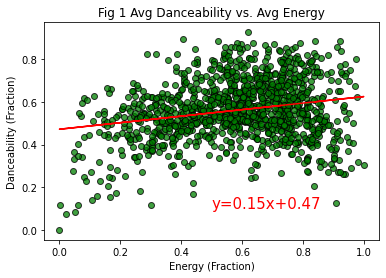

In [6]:
#Plotting scatter chart, line curve, line equation
dance_energy= regression(audio_analysis["Energy"], audio_analysis["Danceability"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Danceability"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],dance_energy[0],"r-")
#Printing the line equation
plt.annotate(dance_energy[1],(0.5,0.1), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Danceability (Fraction)")
plt.title("Fig 1 Avg Danceability vs. Avg Energy")
#Printing r-squared factor
print(f"The r-squared is : {dance_energy[2]}")
#saving plot as "png" file
plt.savefig("Fig1.png")
plt.show()

Valence VS Energy

The r-squared is : 0.13005339331930618


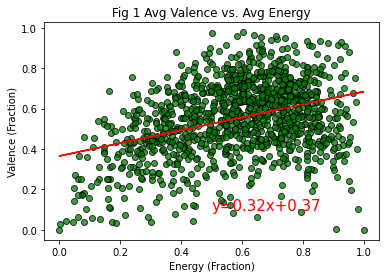

In [7]:
#Plotting scatter chart, line curve, line equation
energy_valence= regression(audio_analysis["Energy"], audio_analysis["Valence"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Valence"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],energy_valence[0],"r-")
#Printing the line equation
plt.annotate(energy_valence[1],(0.5,0.1), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Valence (Fraction)")
plt.title("Fig 1 Avg Valence vs. Avg Energy")
#Printing r-squared factor
print(f"The r-squared is : {energy_valence[2]}")
#saving plot as "png" file
plt.savefig("Fig1.png")
plt.show()

Loudness VS Energy

The r-squared is : 0.6605830204582631


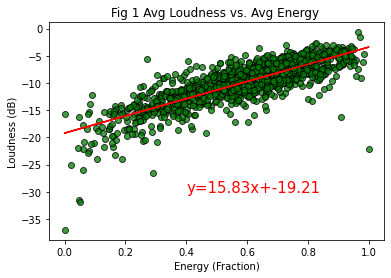

In [8]:
#Plotting scatter chart, line curve, line equation
energy_loudness= regression(audio_analysis["Energy"], audio_analysis["Loudness"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Loudness"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],energy_loudness[0],"r-")
#Printing the line equation
plt.annotate(energy_loudness[1],(0.4,-30), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Loudness (dB)")
plt.title("Fig 1 Avg Loudness vs. Avg Energy ")
#Printing r-squared factor
print(f"The r-squared is : {energy_loudness[2]}")
#saving plot as "png" file
plt.savefig("Fig3.png")
plt.show()

Danceability VS Valence

The r-squared is : 0.32726553235009975


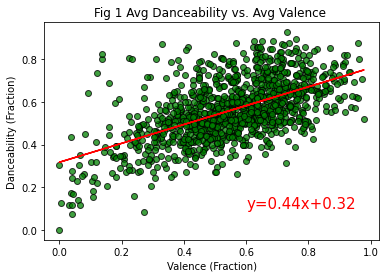

In [9]:
#Plotting scatter chart, line curve, line equation
valence_danceability= regression(audio_analysis["Valence"], audio_analysis["Danceability"])
plt.scatter(audio_analysis["Valence"],audio_analysis["Danceability"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Valence"],valence_danceability[0],"r-")
#Printing the line equation
plt.annotate(valence_danceability[1],(0.6,0.1), fontsize=15, color="red")
plt.xlabel("Valence (Fraction)")
plt.ylabel("Danceability (Fraction)")
plt.title("Fig 1 Avg Danceability vs. Avg Valence ")
#Printing r-squared factor
print(f"The r-squared is : {valence_danceability[2]}")
#saving plot as "png" file
plt.savefig("Fig6.png")
plt.show()

Danceability VS Speechiness

The r-squared is : 0.13831563230010252


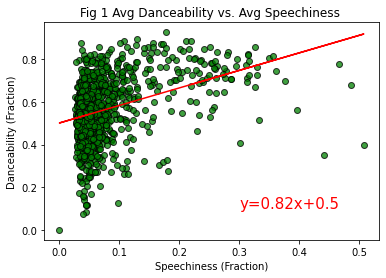

In [10]:
#Plotting scatter chart, line curve, line equation
speechiness_danceability= regression(audio_analysis["Speechiness"], audio_analysis["Danceability"])
plt.scatter(audio_analysis["Speechiness"],audio_analysis["Danceability"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Speechiness"],speechiness_danceability[0],"r-")
#Printing the line equation
plt.annotate(speechiness_danceability[1],(0.3,0.1), fontsize=15, color="red")
plt.xlabel("Speechiness (Fraction)")
plt.ylabel("Danceability (Fraction)")
plt.title("Fig 1 Avg Danceability vs. Avg Speechiness ")
#Printing r-squared factor
print(f"The r-squared is : {speechiness_danceability[2]}")
#saving plot as "png" file
plt.savefig("Fig7.png")
plt.show()

Trying to find relationships between tracks features and popularity

Danceability vs Popularity

The r-squared is : 0.03524278736257642


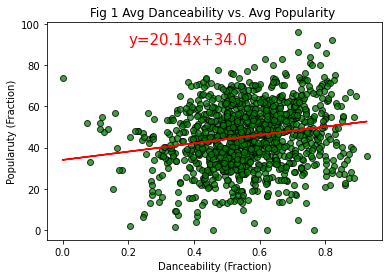

In [11]:
#Plotting scatter chart, line curve, line equation
popularity_danceability= regression(audio_analysis["Danceability"], audio_analysis["Popularity"])
plt.scatter(audio_analysis["Danceability"],audio_analysis["Popularity"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Danceability"],popularity_danceability[0],"r-")
#Printing the line equation
plt.annotate(popularity_danceability[1],(0.2,90), fontsize=15, color="red")
plt.xlabel("Danceability (Fraction)")
plt.ylabel("Popularuty (Fraction)")
plt.title("Fig 1 Avg Danceability vs. Avg Popularity ")
#Printing r-squared factor
print(f"The r-squared is : {popularity_danceability[2]}")
#saving plot as "png" file
plt.savefig("Fig8.png")
plt.show()

Energy VS Popularity

The r-squared is : 0.026434298996995637


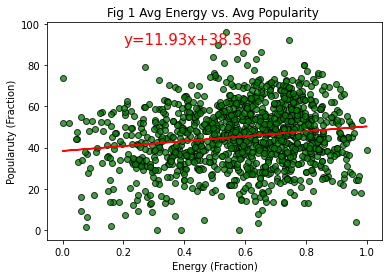

In [12]:
#Plotting scatter chart, line curve, line equation
popularity_energy= regression(audio_analysis["Energy"], audio_analysis["Popularity"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Popularity"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],popularity_energy[0],"r-")
#Printing the line equation
plt.annotate(popularity_energy[1],(0.2,90), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Popularuty (Fraction)")
plt.title("Fig 1 Avg Energy vs. Avg Popularity ")
#Printing r-squared factor
print(f"The r-squared is : {popularity_energy[2]}")
#saving plot as "png" file
plt.savefig("Fig8.png")
plt.show()

Valence VS Popularity

The r-squared is : 0.0002877110091636522


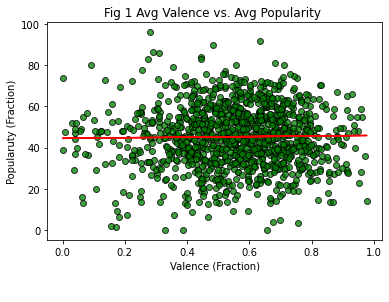

In [13]:
#Plotting scatter chart, line curve, line equation
popularity_valence= regression(audio_analysis["Valence"], audio_analysis["Popularity"])
plt.scatter(audio_analysis["Valence"],audio_analysis["Popularity"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Valence"],popularity_valence[0],"r-")
#Printing the line equation
plt.annotate(popularity_valence[1],(0.4,-30), fontsize=15, color="red")
plt.xlabel("Valence (Fraction)")
plt.ylabel("Popularuty (Fraction)")
plt.title("Fig 1 Avg Valence vs. Avg Popularity ")
#Printing r-squared factor
print(f"The r-squared is : {popularity_valence[2]}")
#saving plot as "png" file
plt.savefig("Fig8.png")
plt.show()

In [14]:
top_100_tracks= tracks_df.sort_values("Popularity", ascending= False)
top_100_tracks= tracks_df.head(100)
top_100_tracks

,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,The Wind Cries Mary,5H6Jp0syB5yEPk7SWYdlmk,1967-05-12,200733,64,0.499,0.495,5.0,-10.508,1.0,0.0501,0.3480,0.028600,0.2000,0.339,80.086
96,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,Foxey Lady,23MrkN7g6Q5U7GLIxNHN1B,1967-05-12,198773,62,0.507,0.847,1.0,-5.987,0.0,0.0411,0.0751,0.237000,0.3720,0.566,98.096
97,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,Castles Made of Sand,3qebSLgUwaEqbwCM5sj5Kh,1967-12-01,168920,62,0.461,0.714,11.0,-9.159,0.0,0.3130,0.5040,0.017100,0.6840,0.454,94.372
98,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,Crosstown Traffic,1ntxpzIUbSsizvuAy6lTYY,1968-10-25,146573,60,0.486,0.963,0.0,-5.586,0.0,0.1290,0.2480,0.000002,0.1580,0.533,113.133


The r-squared is : 0.11626514699520356


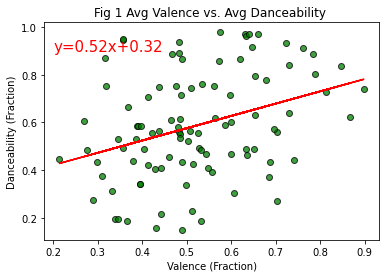

In [15]:
#Plotting scatter chart, line curve, line equation
danceability_valence_100= regression(top_100_tracks["Danceability"], top_100_tracks["Valence"])
plt.scatter(top_100_tracks["Danceability"],top_100_tracks["Valence"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
plt.plot(top_100_tracks["Danceability"],danceability_valence_100[0],"r-")
#Printing the line equation
plt.annotate(danceability_valence_100[1],(0.2,0.9), fontsize=15, color="red")
plt.xlabel("Valence (Fraction)")
plt.ylabel("Danceability (Fraction)")
plt.title("Fig 1 Avg Valence vs. Avg Danceability ")
#Printing r-squared factor
print(f"The r-squared is : {danceability_valence_100[2]}")
#saving plot as "png" file
plt.savefig("Fig9.png")
plt.show()

In [16]:
top_100_artists= artist_df.sort_values("Artist_Popularity",ascending= False)
top_100_artists= top_100_artists.head(100)

The r-squared is : 0.6212372100250126


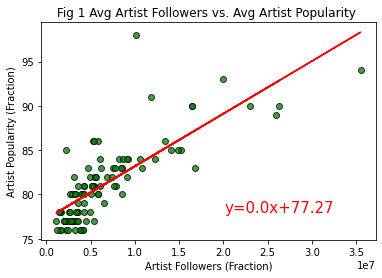

In [17]:
#Plotting scatter chart, line curve, line equation
followers_popularity= regression(top_100_artists["Artist_Followers"], top_100_artists["Artist_Popularity"])
plt.scatter(top_100_artists["Artist_Followers"],top_100_artists["Artist_Popularity"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(top_100_artists["Artist_Followers"],followers_popularity[0],"r-")
#Printing the line equation
plt.annotate(followers_popularity[1],(2.01e7,78), fontsize=15, color="red")
plt.xlabel("Artist Followers (Fraction)")
plt.ylabel("Artist Popularity (Fraction)")
plt.title("Fig 1 Avg Artist Followers vs. Avg Artist Popularity ")
#Printing r-squared factor
print(f"The r-squared is : {followers_popularity[2]}")
#saving plot as "png" file
plt.savefig("Fig9.png")
plt.show()

Artists Main Genre Analysis

In [18]:
#cleaning NaN values
genre_analysis= artist_df.dropna().copy()

In [19]:
# Grouping by "Main Genre"
grouped_genre= genre_analysis.groupby("Main Genre")
artist_by_genre = grouped_genre.agg(Artist_Count= pd.NamedAgg(column="Main Genre", aggfunc="count"), Artist_Avg_Popularity= pd.NamedAgg(column="Artist_Popularity", aggfunc="mean"),
                                   Artist_Avg_Followers= pd.NamedAgg(column="Artist_Followers", aggfunc="mean"))
#Descendig sorting by "Artist_Count"
popular_main_genre= artist_by_genre.sort_values("Artist_Count", ascending=False)
# Selecting the 20 top genres based on artist count
main_genre_popularity= popular_main_genre.head(20).copy()
main_genre_popularity["Artist_Avg_Followers"]=main_genre_popularity["Artist_Avg_Followers"]/1000
main_genre_popularity

,Artist_Count,Artist_Avg_Popularity,Artist_Avg_Followers
Main Genre,,,
alternative rock,101,58.356436,814.306693
album rock,88,69.318182,2096.238295
adult standards,76,63.263158,611.142934
art rock,31,57.387097,336.281516
brill building pop,29,53.931034,223.666759
alternative dance,24,59.750000,532.284667
alternative country,24,52.083333,127.731917
dance pop,24,73.750000,3759.910167
bebop,23,53.478261,265.315739


Generating a bar chart to compare Artists Count and Number of Followers VS Artist's Main Genre

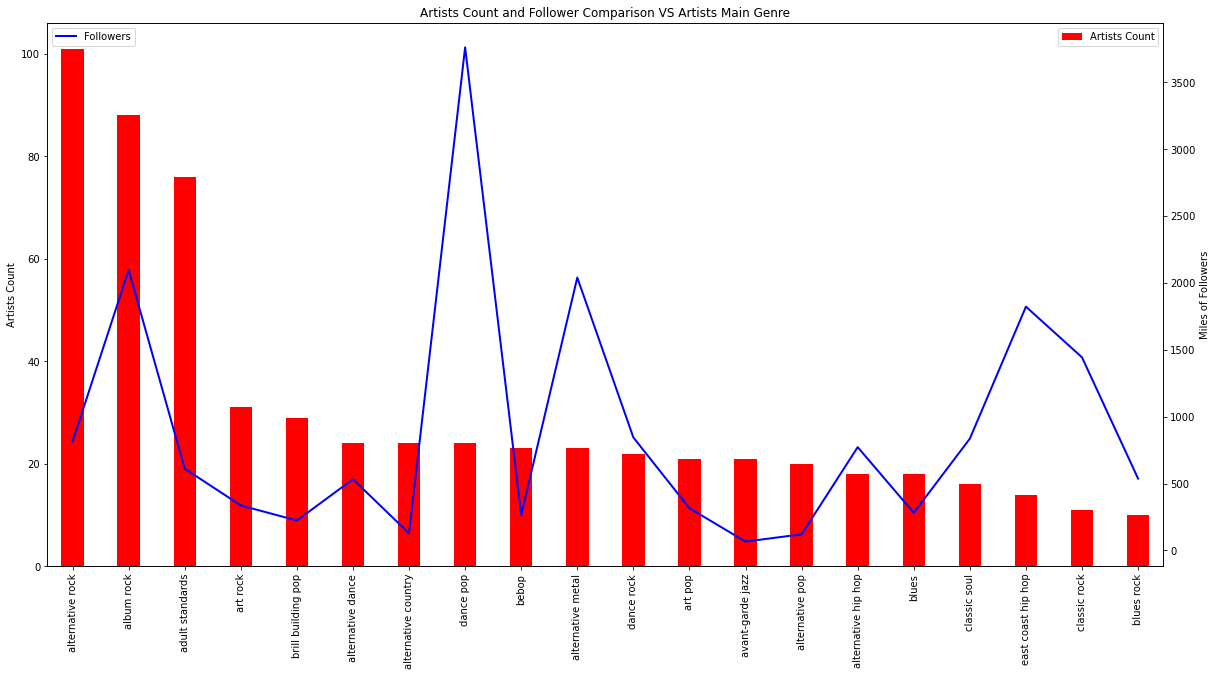

In [48]:
# Create matplotlib figure
fig = plt.figure(figsize=(20,10)) 
# Create matplotlib axes
ax = fig.add_subplot(111) 
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx()

# Bars width
width = 0.4

#Generating bar and line plots with pandas
main_genre_popularity.Artist_Count.plot(kind='bar', color='red', ax=ax, width=width, align='center', label = 'Artists Count')
main_genre_popularity.Artist_Avg_Followers.plot(color='blue', ax=ax2, label='Followers', linewidth=2)

#Styling charts

ax.set_ylabel('Artists Count')
ax.set_xlabel('')
ax.set_title('Artists Count and Follower Comparison VS Artists Main Genre')
ax2.set_ylabel('Miles of Followers')
ax.legend(loc="upper right")
ax2.legend(loc='upper left')
plt.show()

Multiple Genres per Artist Analysis

In [49]:
# Calculating how many genres each artist has
genre_analysis["Genre Count"]= genre_analysis['Artist Genre'].str.count(',').add(1)
genre_analysis

,Artist Name,Artist ID,Artist_Popularity,Artist_Followers,Artist Genre,Main Genre,Genre Count
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,90.0,16410055.0,"beatlesque,british invasion,classic rock,merse...",beatlesque,6
1,The Rolling Stones,22bE4uQ6baNwSHPVcDxLCe,84.0,8678847.0,"album rock,british invasion,classic rock,rock",album rock,4
2,Bob Dylan,74ASZWbe4lXaubB36ztrGX,79.0,4220152.0,"album rock,classic rock,country rock,folk,folk...",album rock,9
3,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,82.0,5524310.0,"album rock,art rock,classic rock,dance rock,gl...",album rock,8
4,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,82.0,9060576.0,"album rock,classic rock,hard rock,rock",album rock,4
...,...,...,...,...,...,...,...
979,The Sundays,4nlqDmbzFzbNITaqjJv7D7,52.0,86662.0,"alternative pop,alternative rock,britpop,dream...",alternative pop,7
980,Herbert,5zCaQxjl110XTrm4LQ1CxY,70.0,100778.0,"classical,classical performance,orchestral per...",classical,3
981,Stephen Stills,4WlSvDKaq1PA2Nr7cCIPxX,56.0,163305.0,"blues rock,classic rock,country rock,folk,folk...",blues rock,12
982,Mazzy Star,37w38cCSGgKLdayTRjna4W,64.0,410642.0,"alternative rock,dream pop,melancholia,slow core",alternative rock,4


In [51]:
#Grouping by Genre Count
genre_count_analysis= genre_analysis.groupby("Genre Count")
#Aggregating Artists Popularity and Folloers mean
multiple_genre_analysis = genre_count_analysis.agg(Artist_Avg_Popularity= pd.NamedAgg(column="Artist_Popularity", aggfunc="mean"),
                                   Artist_Avg_Followers= pd.NamedAgg(column="Artist_Followers", aggfunc="mean"))
multiple_genre_analysis= multiple_genre_analysis.reset_index()
multiple_genre_analysis.head()

,Genre Count,Artist_Avg_Popularity,Artist_Avg_Followers
0,1,51.645161,7.103289e+05
1,2,59.777778,2.362722e+06
2,3,60.125000,2.405650e+06
3,4,62.013158,1.436115e+06
4,5,60.219048,1.435581e+06


Text(0, 0.5, 'Avg Artist Popularity Avg (Fraction)')

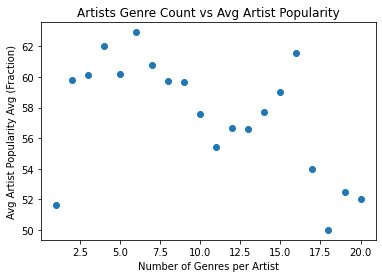

In [54]:
# Finding a trend between Artists Genre Count VS Artists Avg Popularity
plt.scatter(multiple_genre_analysis["Genre Count"],multiple_genre_analysis["Artist_Avg_Popularity"])
plt.title("Artists Genre Count vs Avg Artist Popularity")
plt.xlabel("Number of Genres per Artist")
plt.ylabel("Avg Artist Popularity Avg (Fraction)")


Text(0, 0.5, 'Miles of Artist Followers Avg (Fraction)')

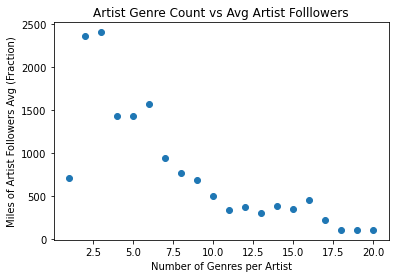

In [55]:
# Finding a trend between Artists Genre Count VS Artists Avg Followers
plt.scatter(multiple_genre_analysis["Genre Count"],multiple_genre_analysis["Artist_Avg_Followers"]/1000)
plt.title("Artist Genre Count vs Avg Artist Folllowers")
plt.xlabel("Number of Genres per Artist")
plt.ylabel("Miles of Artist Followers Avg (Fraction)")

Doing the same, but from raw data

Text(0, 0.5, 'Miles of Artist Followers (Fraction)')

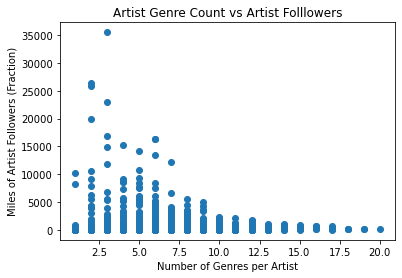

In [56]:
# Finding a trend between Artists Genre Count VS Artists Followers
plt.scatter(genre_analysis["Genre Count"],genre_analysis["Artist_Followers"]/1000)
plt.title("Artist Genre Count vs Artist Folllowers")
plt.xlabel("Number of Genres per Artist")
plt.ylabel("Miles of Artist Followers (Fraction)")


Text(0, 0.5, 'Avg Artist Popularity (Fraction)')

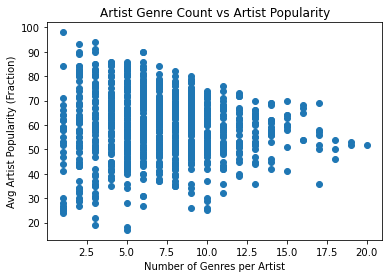

In [57]:
# Finding a trend between Artists Genre Count VS Artists Popularity
plt.scatter(genre_analysis["Genre Count"],genre_analysis["Artist_Popularity"])
plt.title("Artist Genre Count vs Artist Popularity")
plt.xlabel("Number of Genres per Artist")
plt.ylabel("Avg Artist Popularity (Fraction)")

In [ ]:

# group by each genre and create bins of popularity 10-20 , 20-30, 30-40
# figure out the artist count for each genre and then put the artist into bins of popularity.
# Get the 2 popularity bins and plot for each genere

In [ ]:
# finding out a track with more dancebility is more popular

In [ ]:
# in what decade hat kind of songs were more popular. ( track with what features were more popular)

In [ ]:
# Per decade plot a graph for certain features of tracks to see which feature were more popular in cetrain decades

In [ ]:
# popularity of tracks vs track duration. Are tracks with shorter duration are more popular?
# average Track duration is getting shorter over time